* #                                       **Titanic Disaster Competition**


This is my first Competition at Kaggle.
I will try to perform a good analysis of the data and build an appropriate model.


*** Project Steps:**

**1. Data Visualization**

**2. Encoding String Type Variables**

**3. Encoding Categorical Variables**

**4. Data Standardization and Solving For Missing Values**

**5. Dimensionality Reduction**

**6. Data Split**

**7. Building the Models**





First, Let's start by importing the DataSets and reading it.

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os

for dirname, _, filenames in os.walk('/kaggle/input'): # get files directories
    for filename in filenames:
        print(os.path.join(dirname, filename))

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"," "] # Taking into account Missing Values

titanic_train_file_path = '../input/titanic/train.csv'
titanic_train = pd.read_csv(titanic_train_file_path, na_values = missing_value_formats) # reading the training set

titanic_test_file_path = '../input/titanic/test.csv'
titanic_test = pd.read_csv(titanic_test_file_path, na_values = missing_value_formats)# reading the final testing set

titanic_train.head() # first 10 rows of the data




/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Following this Url: https://www.kaggle.com/c/titanic/data , you'll find the Data Dictionnary which explains the meaning of variables names.

Input variables:

* **pclass**: Ticket class - Categorical - Values: 1 = 1st, 2 = 2nd, 3 = 3rd.
* **sex**: Categorical - Values: male or female.
* **Age**: Age in years - Numerical.
* **sibsp**: # of siblings / spouses aboard the Titanic - Numerical.
* **parch**: # of parents / children aboard the Titanic - Numerical.
* **ticket**: Ticket number - Mix of Numbers and Characters.
* **fare**: Passenger fare - Numerical.
* **cabin**: Cabin number - Mix of Numbers and Characters.
* **embarked**: Port of Embarkation - Categorical - Values: C = Cherbourg, Q = Queenstown, S = Southampton.

Target Variable:
* **survival**: Categorical - Values: 0 = No, 1 = Yes.



In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


For the Variables : "PassengerId", "Survived" , "Pclass", the statistics **mean** and **standard deviation** (**std**) are meaningless.

What informations does this table brings:

At First, we can see that we have **891** passenger. their **mean** age is about **29.6** with a standard deviation of **14.5** years which means that for **+** and **- 28** years we capture more than **60%** of the population assuming that we a **Normal distribution** of Ages of the Titanic Population.

By continuing to read the table we get more information for example the **75%** quantile is equal to **38** years and that means that **75%** of the passengers have less than **38** years of age which make the Titanic population a quite young one.

At Second, from the columns of **SibSp** and **Parch** we see that both means are less than **1** which is normal and we can conclude that half of the population have one Sibling/Spouse and **38%** of the population have **1** Parent/Child.

At Last, We have an Important Variable which is **Fare**, this Variable have a high chance to be most explanatory Variable in the final model. Let's start by observing it's statistics: we can see from the mean and std that it has a very high standard deviation which means that there is a big disparity of Fare between the passengers and we can suspect that based on the median value compared to the max and the **75%** quantile. Anyway this will either be  confirmed or disconfirmed by the plots that we're going to make after this.

**P.S: There are 64% male Against 36% female.**


 # 1. Data Visualisation:


Now, Let's move to the plots:



In [4]:
# Center the charts

from IPython.core.display import HTML 
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

* **Plotting The Variable 'Survived':** 

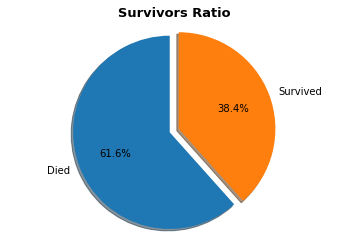

In [5]:
# Pie chart of Variable 'Survived'


import matplotlib.pyplot as plt

labels = 'Died', 'Survived'
sizes = [titanic_train['Survived'].loc[titanic_train['Survived'] == 0].count()/titanic_train['Survived'].count(), titanic_train['Survived'].loc[titanic_train['Survived'] == 1].count()/titanic_train['Survived'].count()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Survived')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Survivors Ratio',  fontsize=13,fontweight='bold')
plt.show()

**Comment:** 

The Pie Chart is a way of representing the ratio of Survivors in the Passengers Population of the Training Data.
We can see that the amount of survivors counts for about 38%.

* **Plotting of Variable 'Pclass':**

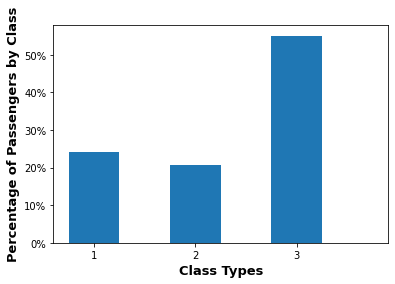

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


plt.hist(titanic_train['Pclass'],weights=np.ones(len(titanic_train['Pclass'])) / len(titanic_train['Pclass']), bins=np.arange(1,5)-0.25 , width=0.5)

plt.ylabel('Percentage of Passengers by Class',  fontsize=13,fontweight='bold')
plt.xlabel('Class Types',  fontsize=13,fontweight='bold')
plt.xticks(range(1,4))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

**Comment:** 

The Chart Above represents the Percentage of Passengers in each Class.
We can see that the amount of Passengers in Class 3 is the widest and it is the smallest in Class 2.

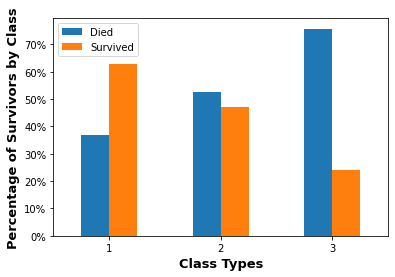

In [7]:
import numpy as np
import matplotlib.pyplot as plt

df=pd.crosstab(titanic_train['Pclass'],titanic_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Class',  fontsize=13,fontweight='bold')
plt.xlabel('Class Types',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)

L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()



**Comment:**

The chart above represents the Percentage of Survivors and Dead Passengers in Each Class.
We can see that Class 1 and Class 3 represent opposite behaviours of Variable 'Survived' as the Majority of Passengers of Class 3 have Died Which is the opposite of what happened in Class 1.

* **Plotting of Variable 'Sex':**

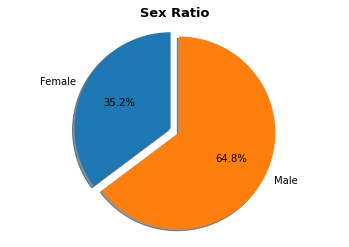

In [8]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = [titanic_train['Sex'].loc[titanic_train['Sex'] == "female"].count()/titanic_train['Sex'].count(), titanic_train['Sex'].loc[titanic_train['Sex'] == "male"].count()/titanic_train['Sex'].count()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sex Ratio',  fontsize=13,fontweight='bold')
plt.show()



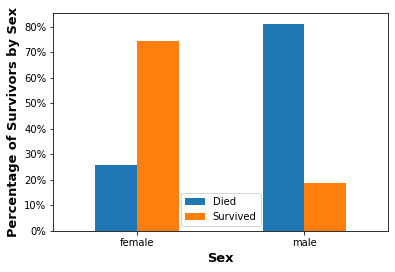

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


df=pd.crosstab(titanic_train['Sex'],titanic_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Sex',  fontsize=13,fontweight='bold')
plt.xlabel('Sex',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)

L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

plt.show()

**Comment:**

For the Female Sex the Majority Survived, While the Opposite happened for the Male Sex.

* **Plotting Of The Variable 'Age':**

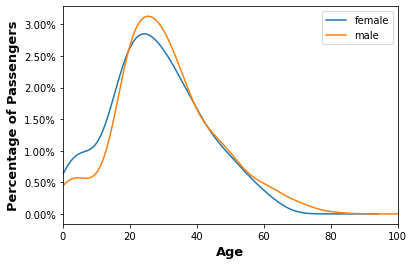

In [10]:
titanic_train.groupby('Sex').Age.plot(kind='kde')
plt.ylabel('Percentage of Passengers',  fontsize=13,fontweight='bold')
plt.xlabel('Age',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
plt.xlim(xmin=0,xmax=100 )
plt.legend()
plt.show()

**Comment:**

We Conclude from the Chart Above That Age has identical Distribution By Sex in the Population of Passengers.

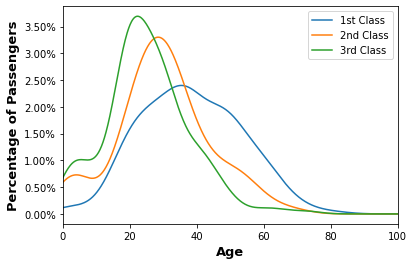

In [11]:
titanic_train.groupby('Pclass').Age.plot(kind='kde')
plt.ylabel('Percentage of Passengers',  fontsize=13,fontweight='bold')
plt.xlabel('Age',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
plt.xlim(xmin=0,xmax=100 )
plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('1st Class')
L.get_texts()[1].set_text('2nd Class')
L.get_texts()[2].set_text('3rd Class')


plt.show()

**Comment:**

The Conclusion for the Above Chart is that the more Age we have the higher is the probability to be in a Higher Class.

* **Plotting Of The Variable 'Fare':**

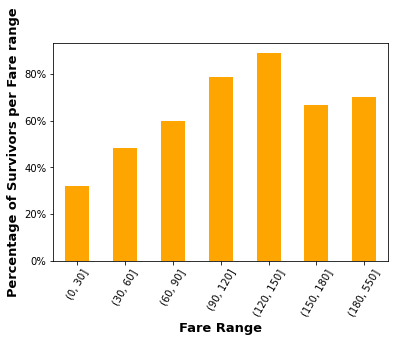

In [12]:
import matplotlib.pyplot as plt

ranges = [0,30,60,90,120,150,180,550]


df1=pd.DataFrame(titanic_train['Fare'].loc[titanic_train['Survived'] == 1].value_counts())
df1=df1.groupby(pd.cut(df1.index, ranges)).sum()
df1.rename(columns={'Fare': 'Survivors'})
df2=pd.DataFrame(titanic_train['Fare'].value_counts())
df2=df2.groupby(pd.cut(df2.index, ranges)).sum()
df2.rename(columns={'Fare': 'Survivors'})

df3=df1/df2
df3.plot.bar(legend=None, color='orange')
plt.xticks(rotation=60)

plt.xlabel('Fare Range',  fontsize=13,fontweight='bold')
plt.ylabel('Percentage of Survivors per Fare range',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))


**Comment:**

The ratio of Survivors is Very low For Poor People Compared to Rich ones.


* **Plotting Of The Variable 'SibSp':**

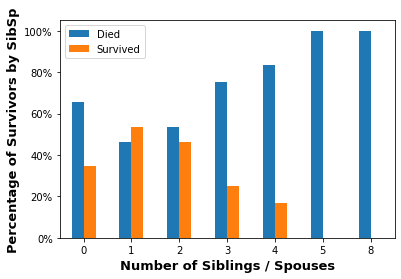

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df=pd.crosstab(titanic_train['SibSp'],titanic_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by SibSp',  fontsize=13,fontweight='bold')
plt.xlabel('Number of Siblings / Spouses',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

**Comment:**

The more Siblings/Spouses you have the more is the chance that you die.

* **Plotting Of The Variable 'Parch':**

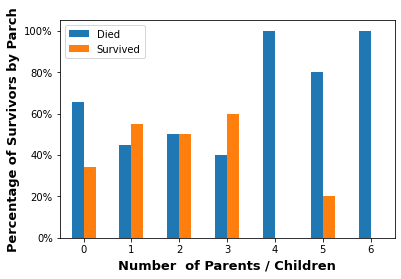

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df=pd.crosstab(titanic_train['Parch'],titanic_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Parch',  fontsize=13,fontweight='bold')
plt.xlabel('Number  of Parents / Children',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

**Comment:**

The more Parents/Children you have the more is the chance that you've died on the Titanic.

# 2. Encoding String Type Variables:
 
The Variables 'Cabin', 'Ticket' and 'Name' are non Categorical String Variables and the first two of them might present a high prediction power so we will try to encode them into there respective Integer Unicodes:

In [15]:
def convert(list): # convert function joins a list of strings into a single string
      
    # Converting integer list to string list 
    s = [str(i) for i in list] 
      
    # Join list items using join() 
    res = int("".join(s)) 
      
    return(res) 

for i in range(0,len(titanic_train['Cabin'])): # Encoding Cabin training column 
        
    if isinstance(titanic_train['Cabin'][i], str):
        
        number = [ord(letter)  for letter in titanic_train['Cabin'][i]]
        
        titanic_train['Cabin'][i]=convert(number)

for i in range(0,len(titanic_test['Cabin'])): # Encoding Cabin Final testing column 
         
    if isinstance(titanic_test['Cabin'][i],str):
        
        number = [ord(letter)  for letter in titanic_test['Cabin'][i]]
        
        titanic_test['Cabin'][i]=convert(number)

    
for i in range(0,len(titanic_train['Ticket'])): # Encoding Ticket training column 
        
    if isinstance(titanic_train['Ticket'][i],str ):
        
        number = [ord(letter)  for letter in titanic_train['Ticket'][i]]
        
        titanic_train['Ticket'][i] = convert(number)

for i in range(0,len(titanic_test['Ticket'])):  # Encoding Ticket Final testing column 
        
    if isinstance(titanic_test['Ticket'][i], str):

        number = [ord(letter)  for letter in titanic_test['Ticket'][i]]

        titanic_test['Ticket'][i] = convert(number)

for i in range(0,len(titanic_train['Name'])): # Encoding Name training column
        
    if isinstance(titanic_train['Name'][i],str ):
        
        number = [ord(letter)  for letter in titanic_train['Name'][i]]
        
        titanic_train['Name'][i] = convert(number)

for i in range(0,len(titanic_test['Name'])): # Encoding Name Final testing column
        
    if isinstance(titanic_test['Name'][i], str):

        number = [ord(letter)  for letter in titanic_test['Name'][i]]

        titanic_test['Name'][i] = convert(number)

# Converting Variables Types to Integers

titanic_train['Ticket']=pd.to_numeric(titanic_train['Ticket'], downcast= 'integer') 
titanic_test['Ticket']=pd.to_numeric(titanic_test['Ticket'], downcast= 'integer')

titanic_train['Cabin']=pd.to_numeric(titanic_train['Cabin'], downcast='integer')
titanic_test['Cabin']=pd.to_numeric(titanic_test['Cabin'], downcast='integer')

titanic_train['Name']=pd.to_numeric(titanic_train['Name'], downcast='integer')
titanic_test['Name']=pd.to_numeric(titanic_test['Name'], downcast='integer')

#Training dataset after encoding

titanic_train.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to b

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
count,891.000000,891.000000,891.000000,8.910000e+02,714.000000,891.000000,891.000000,8.910000e+02,891.000000,2.040000e+02
mean,446.000000,0.383838,2.308642,8.990024e+204,29.699118,0.523008,0.381594,5.776695e+33,32.204208,6.523092e+27
std,257.353842,0.486592,0.836071,inf,14.526497,1.102743,0.806057,6.856935e+34,49.693429,6.571753e+28
min,1.000000,0.000000,1.000000,7.697109e+27,0.420000,0.000000,0.000000,5.457510e+05,0.000000,6.800000e+01
25%,223.500000,0.000000,2.000000,6.954608e+50,20.125000,0.000000,0.000000,5.154575e+09,7.910400,6.651530e+05
50%,446.000000,0.000000,3.000000,7.111111e+64,28.000000,0.000000,0.000000,5.152536e+11,14.454200,6.849510e+05
75%,668.500000,1.000000,3.000000,7.061111e+78,38.000000,1.000000,0.000000,5.149485e+13,31.000000,7.051510e+05
max,891.000000,1.000000,3.000000,8.010111e+207,80.000000,8.000000,6.000000,8.379848e+35,512.329200,6.653553e+29


# 3. Encoding Categorical Variables:

The Variables '**Sex**' and '**Embarked**' are Categorical and of type string so they must be Coded into numbers:

In [16]:
import pandas as pd 

titanic_train['Sex']=titanic_train['Sex'].replace('female',0)
titanic_train['Sex']=titanic_train['Sex'].replace('male',1 )

titanic_test['Sex']=titanic_test['Sex'].replace('female',0)
titanic_test['Sex']=titanic_test['Sex'].replace('male',1 )

titanic_train['Embarked']=titanic_train['Embarked'].replace('C',1 )
titanic_train['Embarked']=titanic_train['Embarked'].replace('Q',2 )
titanic_train['Embarked']=titanic_train['Embarked'].replace('S',3 )

titanic_test['Embarked']=titanic_test['Embarked'].replace('C',1 )
titanic_test['Embarked']=titanic_test['Embarked'].replace('Q',2 )
titanic_test['Embarked']=titanic_test['Embarked'].replace('S',3 )


# 4. Missing Values:
 
Before we move on with the analysis, we have another remark which is missing values in the variable Age. We can find that from the count of variable Age which is less than the count of Passengers or by simply running the following code:

In [17]:
#Test Whether there is any Missing Values in the Datasets

titanic_train.Age.isna().any().any()

True

That returns True.
Let's Calculate the missing values Frequency in Age Column:

In [18]:
#Frequency of Missing Values for Variable 'Age'

titanic_train['Age'].isnull().sum() / len(titanic_train)

0.19865319865319866

So of every Ten rows 2 are having missing values in the variable **Age**.

Let's run the code and get a Summary:



In [19]:
#Summary of missing Values per Feature for Training Dataset

print(titanic_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


So in total we have three  variables which are presenting missing values one Numerical variable which is **Age** and another one wich is a String Variable: **Cabin** and finally **Embarked** variable which presents the lowest frequencey of missing values of only 2 out of 891.

In [20]:
#Frequency of Missing Values for Variable 'Cabin'

titanic_train['Cabin'].isnull().sum() / len(titanic_train)

0.7710437710437711

The '**Cabin**' Variable presents a very high frequency of missing values: of every 10 rows there are more than 7 rows with missing Cabin value.

To solve the missing Values Problem we can try a KNN imputation of the 5 nearest Values of missing values,the problem that will remain unsolvable is the Cabin Variable missing values as there is no logic of replacement available.

In [21]:
#X_train represent the Table of Features of the Training Set
X_train = titanic_train.drop(['Survived','Name','PassengerId'], axis=1)

#X_testfinal represent the Table of Features of the Testing  Set
X_testfinal =titanic_test.drop(['Name','PassengerId'], axis=1)

#Standardizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) )

X_testfinal = pd.DataFrame(scaler.fit_transform(X_testfinal))

#Code For KNN imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)

imputer = KNNImputer(n_neighbors=5)
X_testfinal = pd.DataFrame(imputer.fit_transform(X_testfinal),columns = X_testfinal.columns)

#Summary of missing Values per Feature for Training Dataset
print(X_train.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [23]:
#Summary of Missing Values After Filling for Testing Dataset

print(X_testfinal.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


This analysis is still poor. To have a better information let's bring out our correlation matrix:


In [24]:
# Code for Correlation Matrix

titanic_train.corr()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.0,0.042939,0.036847,-0.057527,-0.001652,-0.005577,0.012658,0.028609,0.013166
Survived,-0.005007,1.000000,-0.338481,0.0,-0.543351,-0.077221,-0.035322,0.081629,-0.064800,0.257307,0.070360,-0.169718
Pclass,-0.035144,-0.338481,1.000000,-0.0,0.131900,-0.369226,0.083081,0.018443,0.069725,-0.549500,-0.037186,0.164681
Name,-0.000000,0.000000,-0.000000,NaN,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
Sex,0.042939,-0.543351,0.131900,-0.0,1.000000,0.093254,-0.114631,-0.245489,0.061852,-0.182333,-0.104507,0.110320
Age,0.036847,-0.077221,-0.369226,-0.0,0.093254,1.000000,-0.308247,-0.189119,-0.007621,0.096067,-0.109171,-0.032565
SibSp,-0.057527,-0.035322,0.083081,0.0,-0.114631,-0.308247,1.000000,0.414838,-0.039873,0.159651,0.247235,0.068900
Parch,-0.001652,0.081629,0.018443,-0.0,-0.245489,-0.189119,0.414838,1.000000,-0.039927,0.216225,0.213677,0.040449
Ticket,-0.005577,-0.064800,0.069725,-0.0,0.061852,-0.007621,-0.039873,-0.039927,1.000000,-0.042662,-0.007647,0.049488
Fare,0.012658,0.257307,-0.549500,0.0,-0.182333,0.096067,0.159651,0.216225,-0.042662,1.000000,0.249712,-0.226311


From the data we can spot many strong correlations such as **Corr(Pclass,Fare)=-0.549** also **Corr(SibSp,Parch)=0.414** but the conclusion is that Sex Variable has the highest correlation with the Survived Variable which is our Target.


 # 5. Dimensionality Reduction: Principal Component Analysis

The Objective here is to find New Variables Based on Combinations of the original Variables and those New Variables will reprensent a Variance of 95% of the original DataSet.

In [26]:
# PCA Code

from sklearn.decomposition import PCA
pca = PCA(.95)
principalComponents = pca.fit(X_train)
X_train = pd.DataFrame(pca.transform(X_train))
X_testfinal = pd.DataFrame(pca.transform(X_testfinal))
print(X_testfinal.isnull().sum())

,0,1,2,3,4,5,6,7
0,-1.161846,0.725699,0.019770,-0.354311,0.502315,-0.506748,-0.046601,0.140682
1,2.165593,-1.271557,-0.686881,1.096024,-0.018903,-0.265596,-1.104145,-0.361682
2,-0.612481,0.468963,-0.596939,0.362754,-1.467477,-0.388120,-0.051795,0.492488
3,1.281731,-0.583693,0.289147,-0.409040,-1.234142,-0.936813,-0.729217,-0.438996
4,-1.386120,-0.193813,0.027431,-0.433492,0.080613,0.137591,0.122247,0.459396
...,...,...,...,...,...,...,...,...
886,-0.780126,-0.450210,0.177713,-0.504275,0.080617,-0.382072,0.393144,-0.506273
887,0.751304,-0.401227,-0.141390,0.050028,-1.498268,-1.177543,0.266970,-1.085308
888,0.712239,2.186757,-0.075491,-0.001845,-1.132022,0.915202,0.386078,0.122156
889,0.639740,-1.515949,-0.627112,0.862439,1.238400,-0.059379,0.108281,-1.368559


We have 8 remaining Variables compared to 11 that we had before running a PCA.

# 6. **Data Split:**

We will split the Training Dataset into 70% training and 30% validation.

In [27]:
# Code for the Split
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, titanic_train.Survived, test_size = 0.3, random_state = 1)

# **7. Building the Models**

* # **The Logistic Model:**
 
Our First Model will be the Logistic Model.

In [28]:
# Code for the Logistic Modelling

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
model =LogisticRegression(class_weight='balanced', random_state=1).fit(X_train,Y_train)
model.score(X_test, Y_test) # Score for the Logistic Modelling

#Code for Testing and Outputing

#test_preds = model.predict(X_testfinal)

#output = pd.DataFrame({'PassengerId': titanic_test["PassengerId"],'Survived': test_preds})

#output.to_csv('LogisticRegressionSubmission16.csv', index=False)

0.7723880597014925

The score for this initial Model is 77,2%.

* # KNN Model:

Let's Build the second Model which is **K-Nearest-Neighbors** Model:

In [29]:
# Code for KNN Model


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn=knn.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on test set: {:.3f}'
     .format(knn.score(X_test, Y_test)))


#from sklearn.preprocessing import LabelEncoder

#test_preds = knn.predict(X_testfinal)
#test_preds

#encoder = LabelEncoder()
#encoder.fit(test_preds)
#test_preds = encoder.transform(test_preds)

#output = pd.DataFrame({'PassengerId': titanic_test["PassengerId"],'Survived': test_preds})
#output.to_csv('LogisticRegressionSubmission15.csv', index=False)

Accuracy of K-NN classifier on test set: 0.776


The Score for KNN model before tuning is 77.6% which is better than Logistic Model without Hyper Tuning.

Now we will try to improve it by running GridSearchCV for Hyperparameter Tuning:


In [30]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,Y_train)

print('Accuracy of K-NN classifier on test set: {:.3f}'
     .format(best_model.score(X_test, Y_test)))

Accuracy of K-NN classifier on test set: 0.787


After Tuning, We get 78.7% which is a better accuracy than the Model before tuning.

* #  **Random Forest:**

In [31]:
# Code for Random Forest


from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier(random_state = 42)
rf_random.fit(X_train, Y_train)

from sklearn import metrics


Y_pred = rf_random.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Accuracy: 0.7574626865671642


The Score for Random Forest model before tuning is 75.7% which is low.

Now we will try to improve it by running RandomizedSearchCV for Hyperparameter Tuning:

In [32]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
best_random = rf_random.fit(X_train, Y_train)


random_accuracy = best_random.score(X_test, Y_test) 

print(random_accuracy)


#test_preds = best_random.predict(X_testfinal)
#test_preds

#encoder = LabelEncoder()
#encoder.fit(test_preds)
#test_preds = encoder.transform(test_preds)

#output = pd.DataFrame({'PassengerId': titanic_test["PassengerId"],'Survived': test_preds})
#output.to_csv('LogisticRegressionSubmission12.csv', index=False)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


0.7723880597014925


The Score after tuning is 77.2% and this is not improving the score.

# **More Models:**

* **XGBoost model:**

In [33]:
#Code for XGBoost model

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Best Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Best Accuracy: 0.7425373134328358


Before tuning we get only 74.2%

Let's Hyper tune the model using **Bayesian Optimization**.

In [36]:

from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import mean_squared_error

Matrixtrain = xgb.DMatrix(X_train, Y_train)

#Bayesian Optimization function for xgboost

#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
     params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
     #Cross validating with the specified parameters in 5 folds and 70 iterations
     cv_result = xgb.cv(params, Matrixtrain, num_boost_round=70, nfold=5)
     #Return the negative RMSE
     return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 20),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,120)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

#Initialize an XGBClassifier with the tuned parameters and fit the training data
from xgboost import XGBClassifier
classifier2 = XGBClassifier(**params).fit(X_train, Y_train)

#predicting for training set
train_p2 = classifier2.predict(X_test)


from sklearn.metrics import classification_report
#Looking at the classification report
print(classification_report(train_p2, Y_test))

from sklearn.metrics import confusion_matrix

#Attained prediction accuracy on the training set
cm = confusion_matrix(train_p2, Y_test)
acc = cm.diagonal().sum()/cm.sum()
print(acc)




|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
[12:02:26] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:02:26] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:02:26] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  pass

|  5        | -0.3892   |  0.4771   |  0.4237   |  12.67    |  111.0    |
[12:02:28] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:02:28] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:02:28] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through

|  10       | -0.386    |  0.4118   |  0.3275   |  9.611    |  100.8    |
[12:02:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:02:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:02:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through

The Score after tuning is 75.7%.

* **Simple Neural Network with Bayesian Optimization:**

In [50]:
#Code for Simple Neural Network with Bayesian Optimization

from bayes_opt import BayesianOptimization
import tensorflow as tf
from sklearn.metrics import accuracy_score
import kerastuner
from keras.models import load_model
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense, Flatten, Activation

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder


from tensorflow import keras

import numpy as np


# Neural Network Build function

def create_model(a,b):
    model = Sequential()

    model.add(keras.layers.Dense(a, input_dim=8 ,activation='relu'))
    model.add(keras.layers.Dropout(b))

    #model.add(keras.layers.Dense(c, activation='relu'))
    #model.add(keras.layers.Dropout(d))
    
    #model.add(keras.layers.Dense(hp.Int('e',1,8,step=1),activation='relu'))
    #model.add(keras.layers.Dropout(hp.Float('f',0.1,0.9,step=0.1)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])
    
    model.fit(X_train, pd.DataFrame(Y_train), 500,  500)
    

    return model


# Model Evaluation function

def evaluate_model(a,b):

    score = create_model(a,b).evaluate(X_test,pd.DataFrame(Y_test),batch_size=500)
    
    return score[1]

np.set_printoptions(precision=2,suppress=True)

# Bounded region of parameter space

pbounds={'a': (1,40),'b': (0.2,0.8)} 

# Bayesian Optimization

optimizer = BayesianOptimization(evaluate_model,pbounds=pbounds,random_state=1)

optimizer.maximize(2,2)

# Accuracy
score = evaluate_model(optimizer.max['params']['a'],optimizer.max['params']['b'])
print(score)
#create_model(optimizer.max['params']['a'],optimizer.max['params']['b']).save('modelX.h5')
#modelX=load_model('modelX.h5')

#test_preds = modelX.predict_classes(X_testfinal)
#test_preds

#encoder = LabelEncoder()
#encoder.fit(test_preds)
#test_preds = pd.DataFrame(encoder.transform(test_preds))

#output = pd.DataFrame({'PassengerId': titanic_test["PassengerId"],'Survived': test_preds[0]})
#output.to_csv('LogisticRegressionSubmissionABCDE.csv', index=False)

|   iter    |  target   |     a     |     b     |
-------------------------------------------------
Epoch 1/500
2/2 [==============================] - ETA: 0s - loss: 0.8362 - accuracy: 0.44 - 0s 3ms/step - loss: 0.8387 - accuracy: 0.4350
Epoch 2/500
2/2 [==============================] - ETA: 0s - loss: 0.8521 - accuracy: 0.40 - 0s 3ms/step - loss: 0.8480 - accuracy: 0.4157
Epoch 3/500
2/2 [==============================] - ETA: 0s - loss: 0.8461 - accuracy: 0.43 - 0s 2ms/step - loss: 0.8358 - accuracy: 0.4430
Epoch 4/500
2/2 [==============================] - ETA: 0s - loss: 0.8211 - accuracy: 0.45 - 0s 2ms/step - loss: 0.8254 - accuracy: 0.4414
Epoch 5/500
2/2 [==============================] - ETA: 0s - loss: 0.8199 - accuracy: 0.43 - 0s 3ms/step - loss: 0.8203 - accuracy: 0.4462
Epoch 6/500
2/2 [==============================] - ETA: 0s - loss: 0.7941 - accuracy: 0.43 - 0s 2ms/step - loss: 0.8160 - accuracy: 0.4173
Epoch 7/500
2/2 [==============================] - ETA: 0s - loss:

Epoch 59/500
2/2 [==============================] - ETA: 0s - loss: 0.6017 - accuracy: 0.65 - 0s 3ms/step - loss: 0.5977 - accuracy: 0.6581
Epoch 60/500
2/2 [==============================] - ETA: 0s - loss: 0.5970 - accuracy: 0.68 - 0s 3ms/step - loss: 0.5902 - accuracy: 0.6870
Epoch 61/500
2/2 [==============================] - ETA: 0s - loss: 0.6044 - accuracy: 0.67 - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6709
Epoch 62/500
2/2 [==============================] - ETA: 0s - loss: 0.5926 - accuracy: 0.67 - 0s 3ms/step - loss: 0.5884 - accuracy: 0.6854
Epoch 63/500
2/2 [==============================] - ETA: 0s - loss: 0.5802 - accuracy: 0.69 - 0s 3ms/step - loss: 0.5748 - accuracy: 0.6982
Epoch 64/500
2/2 [==============================] - ETA: 0s - loss: 0.5755 - accuracy: 0.70 - 0s 3ms/step - loss: 0.5752 - accuracy: 0.6966
Epoch 65/500
2/2 [==============================] - ETA: 0s - loss: 0.5687 - accuracy: 0.69 - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7030
Epoch 66/500
2/2 [==

2/2 [==============================] - ETA: 0s - loss: 0.5494 - accuracy: 0.74 - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7448
Epoch 118/500
2/2 [==============================] - ETA: 0s - loss: 0.5097 - accuracy: 0.74 - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7544
Epoch 119/500
2/2 [==============================] - ETA: 0s - loss: 0.5026 - accuracy: 0.72 - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7448
Epoch 120/500
2/2 [==============================] - ETA: 0s - loss: 0.5014 - accuracy: 0.77 - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7705
Epoch 121/500
2/2 [==============================] - ETA: 0s - loss: 0.5281 - accuracy: 0.72 - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7287
Epoch 122/500
2/2 [==============================] - ETA: 0s - loss: 0.5253 - accuracy: 0.73 - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7271
Epoch 123/500
2/2 [==============================] - ETA: 0s - loss: 0.5295 - accuracy: 0.74 - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7368
Epoch 124/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.77 - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7705
Epoch 176/500
2/2 [==============================] - ETA: 0s - loss: 0.4739 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7881
Epoch 177/500
2/2 [==============================] - ETA: 0s - loss: 0.4913 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7897
Epoch 178/500
2/2 [==============================] - ETA: 0s - loss: 0.4831 - accuracy: 0.77 - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7737
Epoch 179/500
2/2 [==============================] - ETA: 0s - loss: 0.4989 - accuracy: 0.75 - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7705
Epoch 180/500
2/2 [==============================] - ETA: 0s - loss: 0.4557 - accuracy: 0.77 - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7608
Epoch 181/500
2/2 [==============================] - ETA: 0s - loss: 0.4924 - accuracy: 0.76 - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7721
Epoch 182/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.78 - 0s 2ms/step - loss: 0.4632 - accuracy: 0.7929
Epoch 234/500
2/2 [==============================] - ETA: 0s - loss: 0.4747 - accuracy: 0.77 - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7769
Epoch 235/500
2/2 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.78 - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7865
Epoch 236/500
2/2 [==============================] - ETA: 0s - loss: 0.4687 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7978
Epoch 237/500
2/2 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.74 - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7705
Epoch 238/500
2/2 [==============================] - ETA: 0s - loss: 0.4569 - accuracy: 0.78 - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7865
Epoch 239/500
2/2 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.76 - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7817
Epoch 240/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.77 - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7753
Epoch 292/500
2/2 [==============================] - ETA: 0s - loss: 0.4273 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8138
Epoch 293/500
2/2 [==============================] - ETA: 0s - loss: 0.4477 - accuracy: 0.78 - 0s 3ms/step - loss: 0.4479 - accuracy: 0.7929
Epoch 294/500
2/2 [==============================] - ETA: 0s - loss: 0.4570 - accuracy: 0.78 - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7753
Epoch 295/500
2/2 [==============================] - ETA: 0s - loss: 0.4522 - accuracy: 0.78 - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7817
Epoch 296/500
2/2 [==============================] - ETA: 0s - loss: 0.4456 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7849
Epoch 297/500
2/2 [==============================] - ETA: 0s - loss: 0.4651 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7929
Epoch 298/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4415 - accuracy: 0.78 - 0s 4ms/step - loss: 0.4505 - accuracy: 0.7801
Epoch 350/500
2/2 [==============================] - ETA: 0s - loss: 0.4600 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8010
Epoch 351/500
2/2 [==============================] - ETA: 0s - loss: 0.4346 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4355 - accuracy: 0.7994
Epoch 352/500
2/2 [==============================] - ETA: 0s - loss: 0.4659 - accuracy: 0.78 - 0s 3ms/step - loss: 0.4713 - accuracy: 0.7913
Epoch 353/500
2/2 [==============================] - ETA: 0s - loss: 0.4592 - accuracy: 0.78 - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7994
Epoch 354/500
2/2 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8122
Epoch 355/500
2/2 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4428 - accuracy: 0.8042
Epoch 356/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4637 - accuracy: 0.77 - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7817
Epoch 408/500
2/2 [==============================] - ETA: 0s - loss: 0.4321 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8058
Epoch 409/500
2/2 [==============================] - ETA: 0s - loss: 0.4231 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8074
Epoch 410/500
2/2 [==============================] - ETA: 0s - loss: 0.4645 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7961
Epoch 411/500
2/2 [==============================] - ETA: 0s - loss: 0.4449 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8042
Epoch 412/500
2/2 [==============================] - ETA: 0s - loss: 0.4200 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8026
Epoch 413/500
2/2 [==============================] - ETA: 0s - loss: 0.4394 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4499 - accuracy: 0.7994
Epoch 414/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4555 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4470 - accuracy: 0.7929
Epoch 466/500
2/2 [==============================] - ETA: 0s - loss: 0.4518 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8074
Epoch 467/500
2/2 [==============================] - ETA: 0s - loss: 0.4229 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8058
Epoch 468/500
2/2 [==============================] - ETA: 0s - loss: 0.4156 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8042
Epoch 469/500
2/2 [==============================] - ETA: 0s - loss: 0.4266 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8010
Epoch 470/500
2/2 [==============================] - ETA: 0s - loss: 0.4240 - accuracy: 0.82 - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8154
Epoch 471/500
2/2 [==============================] - ETA: 0s - loss: 0.4795 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8218
Epoch 472/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.62 - 0s 2ms/step - loss: 0.6923 - accuracy: 0.6276
Epoch 23/500
2/2 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.64 - 0s 2ms/step - loss: 0.6897 - accuracy: 0.6388
Epoch 24/500
2/2 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.62 - 0s 3ms/step - loss: 0.6864 - accuracy: 0.6356
Epoch 25/500
2/2 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.65 - 0s 3ms/step - loss: 0.6891 - accuracy: 0.6437
Epoch 26/500
2/2 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.63 - 0s 2ms/step - loss: 0.6873 - accuracy: 0.6324
Epoch 27/500
2/2 [==============================] - ETA: 0s - loss: 0.6875 - accuracy: 0.65 - 0s 3ms/step - loss: 0.6880 - accuracy: 0.6372
Epoch 28/500
2/2 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.62 - 0s 3ms/step - loss: 0.6851 - accuracy: 0.6356
Epoch 29/500
2/2 [===============

2/2 [==============================] - ETA: 0s - loss: 0.6582 - accuracy: 0.70 - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6966
Epoch 81/500
2/2 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.66 - 0s 3ms/step - loss: 0.6696 - accuracy: 0.6709
Epoch 82/500
2/2 [==============================] - ETA: 0s - loss: 0.6630 - accuracy: 0.68 - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6838
Epoch 83/500
2/2 [==============================] - ETA: 0s - loss: 0.6594 - accuracy: 0.69 - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6870
Epoch 84/500
2/2 [==============================] - ETA: 0s - loss: 0.6691 - accuracy: 0.67 - 0s 3ms/step - loss: 0.6700 - accuracy: 0.6677
Epoch 85/500
2/2 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.70 - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6854
Epoch 86/500
2/2 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.65 - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6597
Epoch 87/500
2/2 [===============

2/2 [==============================] - ETA: 0s - loss: 0.6455 - accuracy: 0.72 - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7175
Epoch 139/500
2/2 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.70 - 0s 3ms/step - loss: 0.6470 - accuracy: 0.7095
Epoch 140/500
2/2 [==============================] - ETA: 0s - loss: 0.6336 - accuracy: 0.73 - 0s 3ms/step - loss: 0.6365 - accuracy: 0.7335
Epoch 141/500
2/2 [==============================] - ETA: 0s - loss: 0.6524 - accuracy: 0.71 - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7159
Epoch 142/500
2/2 [==============================] - ETA: 0s - loss: 0.6457 - accuracy: 0.69 - 0s 3ms/step - loss: 0.6432 - accuracy: 0.7079
Epoch 143/500
2/2 [==============================] - ETA: 0s - loss: 0.6522 - accuracy: 0.69 - 0s 2ms/step - loss: 0.6512 - accuracy: 0.7063
Epoch 144/500
2/2 [==============================] - ETA: 0s - loss: 0.6432 - accuracy: 0.71 - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7207
Epoch 145/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.6188 - accuracy: 0.73 - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7335
Epoch 197/500
2/2 [==============================] - ETA: 0s - loss: 0.6199 - accuracy: 0.72 - 0s 3ms/step - loss: 0.6204 - accuracy: 0.7271
Epoch 198/500
2/2 [==============================] - ETA: 0s - loss: 0.6172 - accuracy: 0.74 - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7271
Epoch 199/500
2/2 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.73 - 0s 3ms/step - loss: 0.6245 - accuracy: 0.7239
Epoch 200/500
2/2 [==============================] - ETA: 0s - loss: 0.6116 - accuracy: 0.74 - 0s 2ms/step - loss: 0.6183 - accuracy: 0.7352
Epoch 201/500
2/2 [==============================] - ETA: 0s - loss: 0.6201 - accuracy: 0.72 - 0s 2ms/step - loss: 0.6231 - accuracy: 0.7223
Epoch 202/500
2/2 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.74 - 0s 2ms/step - loss: 0.6045 - accuracy: 0.7496
Epoch 203/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.6026 - accuracy: 0.72 - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7368
Epoch 255/500
2/2 [==============================] - ETA: 0s - loss: 0.5941 - accuracy: 0.74 - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7592
Epoch 256/500
2/2 [==============================] - ETA: 0s - loss: 0.6103 - accuracy: 0.73 - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7368
Epoch 257/500
2/2 [==============================] - ETA: 0s - loss: 0.5848 - accuracy: 0.76 - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7560
Epoch 258/500
2/2 [==============================] - ETA: 0s - loss: 0.5762 - accuracy: 0.76 - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7576
Epoch 259/500
2/2 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7576
Epoch 260/500
2/2 [==============================] - ETA: 0s - loss: 0.5886 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7528
Epoch 261/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.5727 - accuracy: 0.75 - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7544
Epoch 313/500
2/2 [==============================] - ETA: 0s - loss: 0.5870 - accuracy: 0.73 - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7480
Epoch 314/500
2/2 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7528
Epoch 315/500
2/2 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.76 - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7480
Epoch 316/500
2/2 [==============================] - ETA: 0s - loss: 0.5636 - accuracy: 0.76 - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7769
Epoch 317/500
2/2 [==============================] - ETA: 0s - loss: 0.5692 - accuracy: 0.75 - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7512
Epoch 318/500
2/2 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7624
Epoch 319/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.5677 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7528
Epoch 371/500
2/2 [==============================] - ETA: 0s - loss: 0.5776 - accuracy: 0.72 - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7287
Epoch 372/500
2/2 [==============================] - ETA: 0s - loss: 0.5739 - accuracy: 0.73 - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7448
Epoch 373/500
2/2 [==============================] - ETA: 0s - loss: 0.5601 - accuracy: 0.76 - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7576
Epoch 374/500
2/2 [==============================] - ETA: 0s - loss: 0.5559 - accuracy: 0.76 - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7640
Epoch 375/500
2/2 [==============================] - ETA: 0s - loss: 0.5786 - accuracy: 0.73 - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7416
Epoch 376/500
2/2 [==============================] - ETA: 0s - loss: 0.5807 - accuracy: 0.73 - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7368
Epoch 377/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.5622 - accuracy: 0.74 - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7448
Epoch 429/500
2/2 [==============================] - ETA: 0s - loss: 0.5449 - accuracy: 0.75 - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7657
Epoch 430/500
2/2 [==============================] - ETA: 0s - loss: 0.5596 - accuracy: 0.75 - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7528
Epoch 431/500
2/2 [==============================] - ETA: 0s - loss: 0.5470 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7592
Epoch 432/500
2/2 [==============================] - ETA: 0s - loss: 0.5631 - accuracy: 0.73 - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7175
Epoch 433/500
2/2 [==============================] - ETA: 0s - loss: 0.5689 - accuracy: 0.73 - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7416
Epoch 434/500
2/2 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.74 - 0s 4ms/step - loss: 0.5540 - accuracy: 0.7544
Epoch 435/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.5425 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7592
Epoch 487/500
2/2 [==============================] - ETA: 0s - loss: 0.5520 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7560
Epoch 488/500
2/2 [==============================] - ETA: 0s - loss: 0.5608 - accuracy: 0.73 - 0s 3ms/step - loss: 0.5531 - accuracy: 0.7464
Epoch 489/500
2/2 [==============================] - ETA: 0s - loss: 0.5683 - accuracy: 0.73 - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7416
Epoch 490/500
2/2 [==============================] - ETA: 0s - loss: 0.5369 - accuracy: 0.76 - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7560
Epoch 491/500
2/2 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.74 - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7480
Epoch 492/500
2/2 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.78 - 0s 3ms/step - loss: 0.5407 - accuracy: 0.7657
Epoch 493/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.6253 - accuracy: 0.67 - 0s 2ms/step - loss: 0.6225 - accuracy: 0.6661
Epoch 44/500
2/2 [==============================] - ETA: 0s - loss: 0.6404 - accuracy: 0.63 - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6517
Epoch 45/500
2/2 [==============================] - ETA: 0s - loss: 0.6136 - accuracy: 0.68 - 0s 2ms/step - loss: 0.6080 - accuracy: 0.6886
Epoch 46/500
2/2 [==============================] - ETA: 0s - loss: 0.5981 - accuracy: 0.67 - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6822
Epoch 47/500
2/2 [==============================] - ETA: 0s - loss: 0.6163 - accuracy: 0.63 - 0s 3ms/step - loss: 0.6068 - accuracy: 0.6517
Epoch 48/500
2/2 [==============================] - ETA: 0s - loss: 0.6472 - accuracy: 0.64 - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6421
Epoch 49/500
2/2 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.73 - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7287
Epoch 50/500
2/2 [===============

2/2 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.74 - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7496
Epoch 102/500
2/2 [==============================] - ETA: 0s - loss: 0.5088 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7978
Epoch 103/500
2/2 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.77 - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7640
Epoch 104/500
2/2 [==============================] - ETA: 0s - loss: 0.5294 - accuracy: 0.73 - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7432
Epoch 105/500
2/2 [==============================] - ETA: 0s - loss: 0.5171 - accuracy: 0.75 - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7608
Epoch 106/500
2/2 [==============================] - ETA: 0s - loss: 0.5158 - accuracy: 0.76 - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7560
Epoch 107/500
2/2 [==============================] - ETA: 0s - loss: 0.5010 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7480
Epoch 108/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4835 - accuracy: 0.77 - 0s 3ms/step - loss: 0.4871 - accuracy: 0.7785
Epoch 160/500
2/2 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 0.78 - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7673
Epoch 161/500
2/2 [==============================] - ETA: 0s - loss: 0.5117 - accuracy: 0.76 - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7721
Epoch 162/500
2/2 [==============================] - ETA: 0s - loss: 0.4801 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4703 - accuracy: 0.8026
Epoch 163/500
2/2 [==============================] - ETA: 0s - loss: 0.4640 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7913
Epoch 164/500
2/2 [==============================] - ETA: 0s - loss: 0.4854 - accuracy: 0.78 - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7801
Epoch 165/500
2/2 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.78 - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7865
Epoch 166/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4556 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4503 - accuracy: 0.8170
Epoch 218/500
2/2 [==============================] - ETA: 0s - loss: 0.4758 - accuracy: 0.78 - 0s 3ms/step - loss: 0.4753 - accuracy: 0.7978
Epoch 219/500
2/2 [==============================] - ETA: 0s - loss: 0.4470 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4677 - accuracy: 0.7978
Epoch 220/500
2/2 [==============================] - ETA: 0s - loss: 0.4598 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8154
Epoch 221/500
2/2 [==============================] - ETA: 0s - loss: 0.4548 - accuracy: 0.80 - 0s 3ms/step - loss: 0.4643 - accuracy: 0.7945
Epoch 222/500
2/2 [==============================] - ETA: 0s - loss: 0.4660 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7961
Epoch 223/500
2/2 [==============================] - ETA: 0s - loss: 0.4551 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4465 - accuracy: 0.7945
Epoch 224/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4710 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7978
Epoch 276/500
2/2 [==============================] - ETA: 0s - loss: 0.4581 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4596 - accuracy: 0.8074
Epoch 277/500
2/2 [==============================] - ETA: 0s - loss: 0.4373 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8218
Epoch 278/500
2/2 [==============================] - ETA: 0s - loss: 0.4240 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8058
Epoch 279/500
2/2 [==============================] - ETA: 0s - loss: 0.4536 - accuracy: 0.83 - 0s 4ms/step - loss: 0.4363 - accuracy: 0.8315
Epoch 280/500
2/2 [==============================] - ETA: 0s - loss: 0.4164 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8363
Epoch 281/500
2/2 [==============================] - ETA: 0s - loss: 0.4311 - accuracy: 0.82 - 0s 4ms/step - loss: 0.4299 - accuracy: 0.8170
Epoch 282/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4562 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8234
Epoch 334/500
2/2 [==============================] - ETA: 0s - loss: 0.4438 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8138
Epoch 335/500
2/2 [==============================] - ETA: 0s - loss: 0.4447 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8266
Epoch 336/500
2/2 [==============================] - ETA: 0s - loss: 0.4110 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8331
Epoch 337/500
2/2 [==============================] - ETA: 0s - loss: 0.4326 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8122
Epoch 338/500
2/2 [==============================] - ETA: 0s - loss: 0.4120 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8315
Epoch 339/500
2/2 [==============================] - ETA: 0s - loss: 0.4719 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4504 - accuracy: 0.8170
Epoch 340/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4362 - accuracy: 0.84 - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8411
Epoch 392/500
2/2 [==============================] - ETA: 0s - loss: 0.4124 - accuracy: 0.84 - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8427
Epoch 393/500
2/2 [==============================] - ETA: 0s - loss: 0.4348 - accuracy: 0.80 - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8074
Epoch 394/500
2/2 [==============================] - ETA: 0s - loss: 0.4303 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8218
Epoch 395/500
2/2 [==============================] - ETA: 0s - loss: 0.4191 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8058
Epoch 396/500
2/2 [==============================] - ETA: 0s - loss: 0.4170 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4258 - accuracy: 0.8170
Epoch 397/500
2/2 [==============================] - ETA: 0s - loss: 0.4498 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8202
Epoch 398/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.84 - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8202
Epoch 450/500
2/2 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.84 - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8427
Epoch 451/500
2/2 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8299
Epoch 452/500
2/2 [==============================] - ETA: 0s - loss: 0.4236 - accuracy: 0.84 - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8331
Epoch 453/500
2/2 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8250
Epoch 454/500
2/2 [==============================] - ETA: 0s - loss: 0.4207 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8202
Epoch 455/500
2/2 [==============================] - ETA: 0s - loss: 0.4381 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8266
Epoch 456/500
2/2 [========

Epoch 6/500
2/2 [==============================] - ETA: 0s - loss: 0.6817 - accuracy: 0.57 - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5634
Epoch 7/500
2/2 [==============================] - ETA: 0s - loss: 0.6769 - accuracy: 0.56 - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5538
Epoch 8/500
2/2 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.61 - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6035
Epoch 9/500
2/2 [==============================] - ETA: 0s - loss: 0.6460 - accuracy: 0.61 - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6019
Epoch 10/500
2/2 [==============================] - ETA: 0s - loss: 0.6397 - accuracy: 0.62 - 0s 3ms/step - loss: 0.6395 - accuracy: 0.6212
Epoch 11/500
2/2 [==============================] - ETA: 0s - loss: 0.6474 - accuracy: 0.64 - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6469
Epoch 12/500
2/2 [==============================] - ETA: 0s - loss: 0.6474 - accuracy: 0.61 - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6164
Epoch 13/500
2/2 [======

2/2 [==============================] - ETA: 0s - loss: 0.4963 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4883 - accuracy: 0.8026
Epoch 65/500
2/2 [==============================] - ETA: 0s - loss: 0.5044 - accuracy: 0.78 - 0s 3ms/step - loss: 0.4883 - accuracy: 0.7994
Epoch 66/500
2/2 [==============================] - ETA: 0s - loss: 0.4798 - accuracy: 0.80 - 0s 3ms/step - loss: 0.4808 - accuracy: 0.8026
Epoch 67/500
2/2 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.80 - 0s 3ms/step - loss: 0.4911 - accuracy: 0.8026
Epoch 68/500
2/2 [==============================] - ETA: 0s - loss: 0.4856 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4860 - accuracy: 0.8170
Epoch 69/500
2/2 [==============================] - ETA: 0s - loss: 0.4634 - accuracy: 0.80 - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7961
Epoch 70/500
2/2 [==============================] - ETA: 0s - loss: 0.4633 - accuracy: 0.80 - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7945
Epoch 71/500
2/2 [===============

2/2 [==============================] - ETA: 0s - loss: 0.4466 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8138
Epoch 123/500
2/2 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8106
Epoch 124/500
2/2 [==============================] - ETA: 0s - loss: 0.4471 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8154
Epoch 125/500
2/2 [==============================] - ETA: 0s - loss: 0.4046 - accuracy: 0.84 - 0s 3ms/step - loss: 0.4259 - accuracy: 0.8331
Epoch 126/500
2/2 [==============================] - ETA: 0s - loss: 0.4305 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4448 - accuracy: 0.8138
Epoch 127/500
2/2 [==============================] - ETA: 0s - loss: 0.4242 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8170
Epoch 128/500
2/2 [==============================] - ETA: 0s - loss: 0.4335 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8122
Epoch 129/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4114 - accuracy: 0.82 - 0s 3ms/step - loss: 0.4200 - accuracy: 0.8170
Epoch 181/500
2/2 [==============================] - ETA: 0s - loss: 0.4282 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8218
Epoch 182/500
2/2 [==============================] - ETA: 0s - loss: 0.4175 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8315
Epoch 183/500
2/2 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8058
Epoch 184/500
2/2 [==============================] - ETA: 0s - loss: 0.3990 - accuracy: 0.84 - 0s 3ms/step - loss: 0.4048 - accuracy: 0.8299
Epoch 185/500
2/2 [==============================] - ETA: 0s - loss: 0.4356 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8170
Epoch 186/500
2/2 [==============================] - ETA: 0s - loss: 0.4210 - accuracy: 0.82 - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8299
Epoch 187/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4084 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8379
Epoch 239/500
2/2 [==============================] - ETA: 0s - loss: 0.4183 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8363
Epoch 240/500
2/2 [==============================] - ETA: 0s - loss: 0.4078 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8170
Epoch 241/500
2/2 [==============================] - ETA: 0s - loss: 0.4111 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8379
Epoch 242/500
2/2 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8363
Epoch 243/500
2/2 [==============================] - ETA: 0s - loss: 0.4181 - accuracy: 0.82 - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8186
Epoch 244/500
2/2 [==============================] - ETA: 0s - loss: 0.4082 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8283
Epoch 245/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4256 - accuracy: 0.82 - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8347
Epoch 297/500
2/2 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8234
Epoch 298/500
2/2 [==============================] - ETA: 0s - loss: 0.3835 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8491
Epoch 299/500
2/2 [==============================] - ETA: 0s - loss: 0.4081 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8347
Epoch 300/500
2/2 [==============================] - ETA: 0s - loss: 0.4290 - accuracy: 0.82 - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8379
Epoch 301/500
2/2 [==============================] - ETA: 0s - loss: 0.4088 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8411
Epoch 302/500
2/2 [==============================] - ETA: 0s - loss: 0.4024 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8347
Epoch 303/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.84 - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8411
Epoch 355/500
2/2 [==============================] - ETA: 0s - loss: 0.4000 - accuracy: 0.82 - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8395
Epoch 356/500
2/2 [==============================] - ETA: 0s - loss: 0.3929 - accuracy: 0.83 - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8395
Epoch 357/500
2/2 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8234
Epoch 358/500
2/2 [==============================] - ETA: 0s - loss: 0.3790 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8539
Epoch 359/500
2/2 [==============================] - ETA: 0s - loss: 0.3879 - accuracy: 0.84 - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8347
Epoch 360/500
2/2 [==============================] - ETA: 0s - loss: 0.3934 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8459
Epoch 361/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.3941 - accuracy: 0.83 - 0s 3ms/step - loss: 0.3909 - accuracy: 0.8347
Epoch 413/500
2/2 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8459
Epoch 414/500
2/2 [==============================] - ETA: 0s - loss: 0.3985 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8491
Epoch 415/500
2/2 [==============================] - ETA: 0s - loss: 0.3894 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8491
Epoch 416/500
2/2 [==============================] - ETA: 0s - loss: 0.3916 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8491
Epoch 417/500
2/2 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8475
Epoch 418/500
2/2 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8475
Epoch 419/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4139 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8283
Epoch 471/500
2/2 [==============================] - ETA: 0s - loss: 0.3675 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8427
Epoch 472/500
2/2 [==============================] - ETA: 0s - loss: 0.3541 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8363
Epoch 473/500
2/2 [==============================] - ETA: 0s - loss: 0.3986 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8475
Epoch 474/500
2/2 [==============================] - ETA: 0s - loss: 0.3692 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8395
Epoch 475/500
2/2 [==============================] - ETA: 0s - loss: 0.3680 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8395
Epoch 476/500
2/2 [==============================] - ETA: 0s - loss: 0.3705 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8459
Epoch 477/500
2/2 [========

Epoch 27/500
2/2 [==============================] - ETA: 0s - loss: 0.5923 - accuracy: 0.66 - 0s 2ms/step - loss: 0.5912 - accuracy: 0.6613
Epoch 28/500
2/2 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.66 - 0s 3ms/step - loss: 0.6010 - accuracy: 0.6629
Epoch 29/500
2/2 [==============================] - ETA: 0s - loss: 0.5972 - accuracy: 0.69 - 0s 3ms/step - loss: 0.5962 - accuracy: 0.6902
Epoch 30/500
2/2 [==============================] - ETA: 0s - loss: 0.5982 - accuracy: 0.66 - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6629
Epoch 31/500
2/2 [==============================] - ETA: 0s - loss: 0.5965 - accuracy: 0.69 - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6854
Epoch 32/500
2/2 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.69 - 0s 3ms/step - loss: 0.5800 - accuracy: 0.6758
Epoch 33/500
2/2 [==============================] - ETA: 0s - loss: 0.5649 - accuracy: 0.70 - 0s 3ms/step - loss: 0.5738 - accuracy: 0.6950
Epoch 34/500
2/2 [==

2/2 [==============================] - ETA: 0s - loss: 0.4899 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4918 - accuracy: 0.7881
Epoch 86/500
2/2 [==============================] - ETA: 0s - loss: 0.4931 - accuracy: 0.78 - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7705
Epoch 87/500
2/2 [==============================] - ETA: 0s - loss: 0.5199 - accuracy: 0.76 - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7721
Epoch 88/500
2/2 [==============================] - ETA: 0s - loss: 0.5024 - accuracy: 0.77 - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7769
Epoch 89/500
2/2 [==============================] - ETA: 0s - loss: 0.4941 - accuracy: 0.76 - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7608
Epoch 90/500
2/2 [==============================] - ETA: 0s - loss: 0.5156 - accuracy: 0.77 - 0s 3ms/step - loss: 0.4943 - accuracy: 0.7833
Epoch 91/500
2/2 [==============================] - ETA: 0s - loss: 0.5379 - accuracy: 0.72 - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7432
Epoch 92/500
2/2 [===============

2/2 [==============================] - ETA: 0s - loss: 0.4700 - accuracy: 0.78 - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7897
Epoch 144/500
2/2 [==============================] - ETA: 0s - loss: 0.4685 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7945
Epoch 145/500
2/2 [==============================] - ETA: 0s - loss: 0.4612 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4582 - accuracy: 0.8026
Epoch 146/500
2/2 [==============================] - ETA: 0s - loss: 0.4783 - accuracy: 0.77 - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7769
Epoch 147/500
2/2 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7994
Epoch 148/500
2/2 [==============================] - ETA: 0s - loss: 0.4882 - accuracy: 0.77 - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7817
Epoch 149/500
2/2 [==============================] - ETA: 0s - loss: 0.4782 - accuracy: 0.78 - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7833
Epoch 150/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4586 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8090
Epoch 202/500
2/2 [==============================] - ETA: 0s - loss: 0.4761 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4560 - accuracy: 0.8154
Epoch 203/500
2/2 [==============================] - ETA: 0s - loss: 0.4590 - accuracy: 0.80 - 0s 3ms/step - loss: 0.4570 - accuracy: 0.8058
Epoch 204/500
2/2 [==============================] - ETA: 0s - loss: 0.4780 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4594 - accuracy: 0.8058
Epoch 205/500
2/2 [==============================] - ETA: 0s - loss: 0.4551 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4643 - accuracy: 0.7961
Epoch 206/500
2/2 [==============================] - ETA: 0s - loss: 0.4254 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8074
Epoch 207/500
2/2 [==============================] - ETA: 0s - loss: 0.4342 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8122
Epoch 208/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4327 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8218
Epoch 260/500
2/2 [==============================] - ETA: 0s - loss: 0.4261 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8090
Epoch 261/500
2/2 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8138
Epoch 262/500
2/2 [==============================] - ETA: 0s - loss: 0.4631 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4693 - accuracy: 0.8122
Epoch 263/500
2/2 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8266
Epoch 264/500
2/2 [==============================] - ETA: 0s - loss: 0.4601 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8042
Epoch 265/500
2/2 [==============================] - ETA: 0s - loss: 0.4635 - accuracy: 0.80 - 0s 4ms/step - loss: 0.4478 - accuracy: 0.8138
Epoch 266/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4031 - accuracy: 0.84 - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8315
Epoch 318/500
2/2 [==============================] - ETA: 0s - loss: 0.4176 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8395
Epoch 319/500
2/2 [==============================] - ETA: 0s - loss: 0.4781 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8058
Epoch 320/500
2/2 [==============================] - ETA: 0s - loss: 0.4400 - accuracy: 0.82 - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8186
Epoch 321/500
2/2 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8202
Epoch 322/500
2/2 [==============================] - ETA: 0s - loss: 0.4482 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8283
Epoch 323/500
2/2 [==============================] - ETA: 0s - loss: 0.4260 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8090
Epoch 324/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8170
Epoch 376/500
2/2 [==============================] - ETA: 0s - loss: 0.4225 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8331
Epoch 377/500
2/2 [==============================] - ETA: 0s - loss: 0.4360 - accuracy: 0.82 - 0s 3ms/step - loss: 0.4269 - accuracy: 0.8283
Epoch 378/500
2/2 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8266
Epoch 379/500
2/2 [==============================] - ETA: 0s - loss: 0.4551 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8058
Epoch 380/500
2/2 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8106
Epoch 381/500
2/2 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8154
Epoch 382/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4199 - accuracy: 0.83 - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8138
Epoch 434/500
2/2 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8202
Epoch 435/500
2/2 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8234
Epoch 436/500
2/2 [==============================] - ETA: 0s - loss: 0.4433 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8218
Epoch 437/500
2/2 [==============================] - ETA: 0s - loss: 0.4329 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8299
Epoch 438/500
2/2 [==============================] - ETA: 0s - loss: 0.4543 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8202
Epoch 439/500
2/2 [==============================] - ETA: 0s - loss: 0.4340 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4284 - accuracy: 0.8218
Epoch 440/500
2/2 [========

2/2 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8106
Epoch 492/500
2/2 [==============================] - ETA: 0s - loss: 0.4409 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8042
Epoch 493/500
2/2 [==============================] - ETA: 0s - loss: 0.4482 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8266
Epoch 494/500
2/2 [==============================] - ETA: 0s - loss: 0.4128 - accuracy: 0.84 - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8363
Epoch 495/500
2/2 [==============================] - ETA: 0s - loss: 0.4435 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8250
Epoch 496/500
2/2 [==============================] - ETA: 0s - loss: 0.4120 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8234
Epoch 497/500
2/2 [==============================] - ETA: 0s - loss: 0.4311 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4302 - accuracy: 0.8186
Epoch 498/500
2/2 [========

The Score of this simple Neural Network is **79.1%** and it's the best score we had so far but there is still room for improvement.